# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nidya Aulia Adji Putri
- **Email:** nidyaauliaadjip06@gmail.com
- **ID Dicoding:** nidyaaulia04

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca atau musim mempengaruhi jumlah penyewaan sepeda?
- Bagaimana hari kerja mempengaruhi jumlah penyewaan sepeda?
- Bagaimana perbedaan frekuensi antara pengguna biasa dan pengguna terdaftar dalam penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install --upgrade pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


## Data Wrangling

### Gathering Data

In [4]:
url = 'https://raw.githubusercontent.com/callmenidd/Proyek-analisis-data/refs/heads/main/day.csv'
day_df=pd.read_csv(url, encoding= 'unicode_escape')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai Data `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dari informasi diatas dapat dilihat bahwa tidak terdapat missing value
- Kolom dteday terdapat kesalahan tipe data, yang seharusnya adalah tipe data datetime


In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat keanehan pada data diatas

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Memperbaiki Tipe Data

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data kolom dteday menjadi datetime

##### Mengubah isi nilai pada kolom

In [10]:
#Mengubah isi nilai pada kolom weathersit menjadi category
weathersit_dict = {
    1: 'Cerah',         # 1=Clear, Few clouds, Partly cloudy, Partly cloudy
    2: 'Kabut',         # 2=Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: 'Hujan/Salju ringan',  # 3=Light Snow, Light Rain + Thunderstorm
    4: 'Hujan/Salju lebat'    # 4=Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
}

day_df['weathersit'] = day_df['weathersit'].replace(weathersit_dict)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
#Mengubah isi nilai pada kolom season menjadi category
season_dict = {
    1: 'Semi',
    2: 'Panas',
    3: 'Gugur',
    4: 'Dingin'
}

day_df['season'] = day_df['season'].replace(season_dict)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,0,1,0,6,0,Kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,0,1,0,0,0,Kabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Mengapus kolom yang tidak dipakai

In [12]:
column_drop = ['yr','mnth','holiday','weekday','temp','atemp','hum','windspeed']
day_df.drop(column_drop, axis=1, inplace=True)
day_df.head()

,instant,dteday,season,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,Semi,0,Kabut,331,654,985
1,2,2011-01-02,Semi,0,Kabut,131,670,801
2,3,2011-01-03,Semi,1,Cerah,120,1229,1349
3,4,2011-01-04,Semi,1,Cerah,108,1454,1562
4,5,2011-01-05,Semi,1,Cerah,82,1518,1600


In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   workingday  731 non-null    int64         
 4   weathersit  731 non-null    object        
 5   casual      731 non-null    int64         
 6   registered  731 non-null    int64         
 7   cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 45.8+ KB


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [14]:
season_df_count = day_df.groupby('season')['cnt'].sum().reset_index()
season_df_count

,season,cnt
0,Dingin,841613
1,Gugur,1061129
2,Panas,918589
3,Semi,471348


In [15]:
weathersit_df_count = day_df.groupby('weathersit')['cnt'].sum().reset_index()
weathersit_df_count

,weathersit,cnt
0,Cerah,2257952
1,Hujan/Salju ringan,37869
2,Kabut,996858


In [16]:
workingday_df_count = day_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_df_count

,workingday,cnt
0,0,1000269
1,1,2292410


**Insight:**
- Melakukan pengelompokan (pivot table) dari pengguna sepeda berdasarkan musim, cuaca, dan hari kerja

In [17]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_count = day_df['cnt'].sum()

print("Banyak Pengguna Biasa:", total_casual, "pengguna")
print("Banyak Pengguna Terdaftar:", total_registered, "pengguna")
print("Total Pengguna:", total_count, "pengguna")

Banyak Pengguna Biasa: 620017 pengguna
Banyak Pengguna Terdaftar: 2672662 pengguna
Total Pengguna: 3292679 pengguna


## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Rata-Rata Penyewaan Sepeda Berdasarkan Musim')

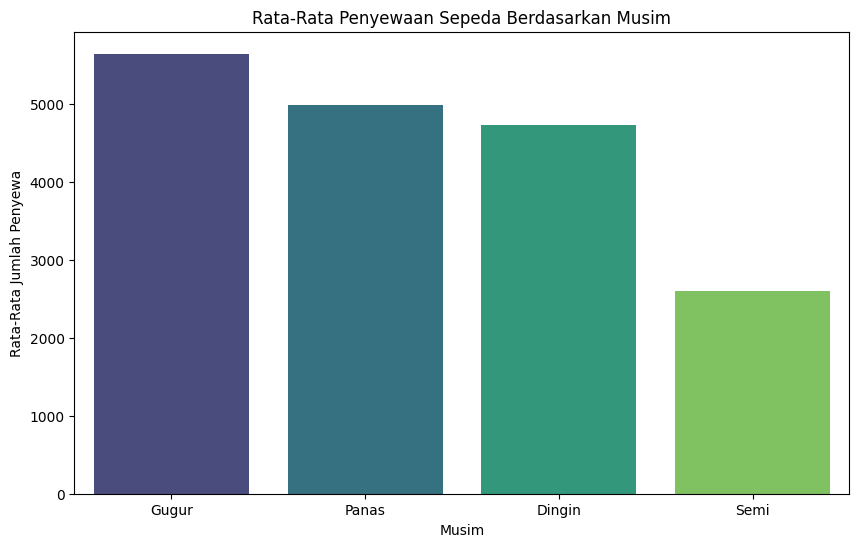

In [18]:
avg_season = day_df.groupby('season')['cnt'].mean().reset_index().sort_values("cnt", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='season',
    y='cnt',
    data=avg_season,
    hue='season',
    palette='viridis'
)
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Penyewa')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Musim')

**Insight:**
- Dari visualisasi data menggunakan bar chart, dapat dilihat bahwa frekuensi rata-rata penggunaan sepeda terbanyak terjadi pada musim gugur
- sedangkan, frekuensi penggunaan sepeda paling sedikit terjadi pada musim semi

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Rata-Rata Penyewaan Sepeda Berdasarkan Cuaca')

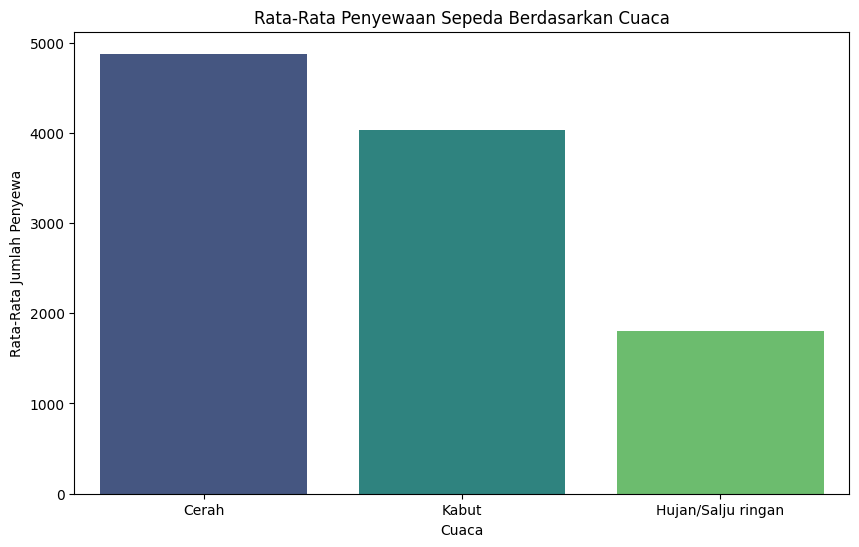

In [22]:
avg_weathersit = day_df.groupby('weathersit')['cnt'].mean().reset_index().sort_values("cnt", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=avg_weathersit,
    hue='weathersit',
    palette='viridis'
)
plt.xlabel('Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewa')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Cuaca')

**Insight:**
- Dari visualisasi data menggunakan bar chart, dapat dilihat bahwa frekuensi rata-rata penggunaan sepeda terbanyak terjadi pada saat cuaca cerah
- sedangkan, frekuensi penggunaan sepeda paling sedikit terjadi pada saat cuaca sedang hujan

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


([<matplotlib.axis.XTick at 0x7e57b70d7e20>,
 [Text(0, 0, 'Libur'), Text(1, 0, 'Hari Kerja')])

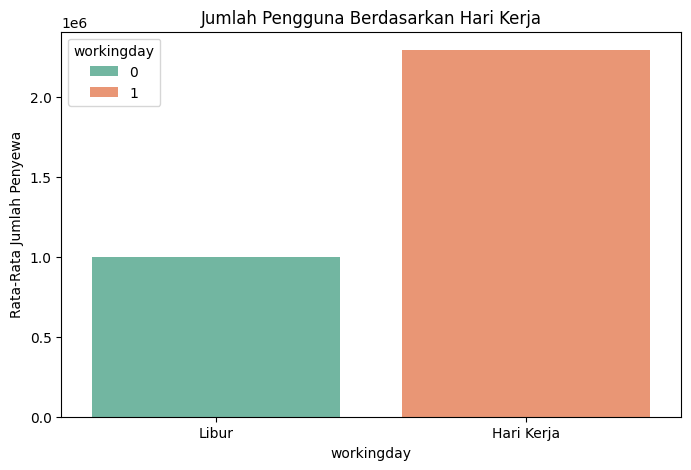

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='workingday',
    y='cnt',
    data=workingday_df_count,
    hue='workingday',
    palette='Set2'
)
plt.ylabel('Rata-Rata Jumlah Penyewa')
plt.title('Jumlah Pengguna Berdasarkan Hari Kerja')
plt.xticks([0,1],['Libur','Hari Kerja'])

**Insight:**
- Dari diagram batang di atas, terlihat bahwa jumlah penggunaan sepeda paling banyak terjadi pada hari kerja (working day)

### Pertanyaan 3:

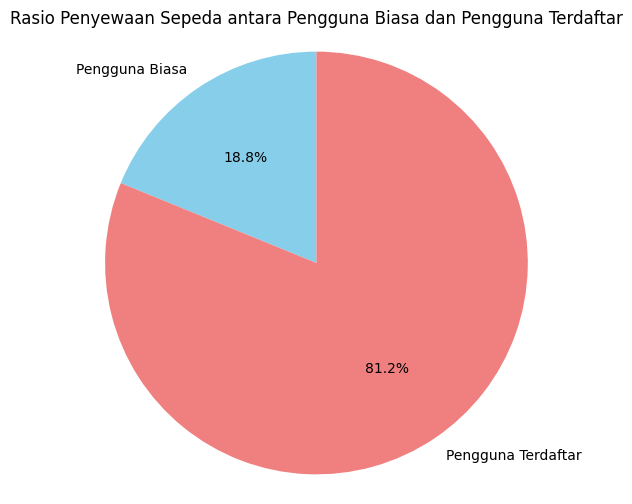

In [21]:
labels = ['Pengguna Biasa', 'Pengguna Terdaftar']
sizes = [total_casual, total_registered]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightcoral'])
plt.axis('equal')

plt.title('Rasio Penyewaan Sepeda antara Pengguna Biasa dan Pengguna Terdaftar')
plt.show()

**Insight:**
- Dari diagram lingkaran di atas, terlihat bahwa pengguna sepeda mayoritas adalah pengguna yang sudah terdaftar dalam rental sepeda

## Conclusion

- Conclution pertanyaan 1 : Kondisi musim dan cuaca sangat mempengaruhi rata-rata penyewaan sepeda. Rata-rata penywaan sepeda paling banyak terjadi saat musim gugur dan pada saat cuaca sedang cerah.
  *   Musim mempengaruhi penyewaan sepeda: Berdasarkan data, pada musim gugur orang-orang lebih banyak menyewa sepeda. Hal ini kemungkinan karena musim gugur adalah musim yang ideal untuk beraktivitas di luar ruangan, karena suhunya normal. Berbeda dengan pada saat musim panas dan musim dingin yang suhunya ekstrem.
  *   Kondisi cuaca mendukung aktivitas di luar ruangan: Berdasarkan data, kondisi cuaca yang cerah memiliki jumlah penyewa sepeda terbanyak. Hal ini kemungkinan terjadi karena cuaca cerah merupakan cuaca yang pas untuk beraktivitas di luar ruangan menikmati pemandangan alam sekitar.
- Conclution pertanyaan 2 : Hari kerja dan hari libur sangat mempengaruhi banyaknya penyewaan sepeda. Penggunaan sepeda paling banyak terjadi pada saat hari kerja.
  *   Keterkaitan penyewaan dan hari kerja: Penyewaan sepeda pada hari kerja lebih banyak dua kali lipat dibandingkan hari libur. Kemungkinan hal ini terjadi berhubungan dengan tingginya aktivitas pada saat hari kerja, seperti sekolah dan bekerja. Dari sini, kemungkinan pengguna sepeda juga dapat diprediksi yaitu mungkin dari kelompok pelajar yang akan bersekolah, dan dari para pekerja yang ingin bekerja.
- Conclution pertanyaan 3 : Pengguna sepeda yang sudah terdaftar memiliki frekuensi yang lebih banyak daripada pengguna biasa. Jadi, dapat disimpulkan bahwa pengguna penyewaan sepeda merupakan orang yang memang sudah memiliki kebiasaan untuk beraktivitas sehari-hari memakai sepeda. Sehingga mereka sudah terdaftar sebagai pengguna resmi. Sedangkan untuk pengguna biasa, kemungkinan merupakan orang yang menyewa sepeda pada saat libur atau sekedar ingin menikmati pemandangan saja.
  